# 全国繁殖数据整理

## 数据导入

In [3]:
#coding:utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
fz=pd.read_csv("F:\\Python\\all.csv",sep=",",encoding='gbk',low_memory=False)
ped=pd.read_csv("F:\\Python\\PED.csv",sep=",",low_memory=False)

In [5]:
fz.dtypes

牛号        object
胎次         int64
发情日期      object
初配日期      object
配次       float64
配种日期      object
与配公牛      object
产犊日期      object
产犊难易度     object
流产日期      object
干奶日期      object
dtype: object

In [6]:
ped.dtypes

牛号       object
出生日期     object
父号       object
母号       object
CODE      int64
DAM     float64
SIRE    float64
dtype: object

## 提取场号

In [7]:
fz1=fz
fz1['场号']=list(map(lambda s: s[0:6],fz1['牛号']))
fz1.head()

牛号  胎次 发情日期 初配日期  配次 配种日期 与配公牛       产犊日期 产犊难易度 流产日期 干奶日期      场号
0  110001000001   1  NaN  NaN NaN  NaN  NaN  2002/1/19   NaN  NaN  NaN  110001
1  110001000003   1  NaN  NaN NaN  NaN  NaN  2002/1/18   NaN  NaN  NaN  110001
2  110001000006   1  NaN  NaN NaN  NaN  NaN  2002/3/25   NaN  NaN  NaN  110001
3  110001000007   1  NaN  NaN NaN  NaN  NaN  2002/7/12   NaN  NaN  NaN  110001
4  110001000008   1  NaN  NaN NaN  NaN  NaN   2002/3/4   NaN  NaN  NaN  110001

In [8]:
ped1=ped
ped1['场号']=list(map(lambda s: s[0:6],ped1['牛号']))
ped1.head()

牛号       出生日期        父号            母号  CODE        DAM  \
0  110001000001   2000/1/6  11193546  110001099169     1     1827.0   
1  110001000003  2000/1/10  31195515  110001095046     2  2860945.0   
2  110001000006  2000/1/16  31195515  110001094056     3  2860946.0   
3  110001000007  2000/1/21  11194143  110001096113     4     1496.0   
4  110001000008  2000/1/20  11194143  110001090136     5  2860947.0   

        SIRE      场号  
0  3970806.0  110001  
1  3970807.0  110001  
2  3970807.0  110001  
3  3970808.0  110001  
4  3970808.0  110001

## 数据集初步提取

提取系谱数据中牛只的出生日期数据，繁殖数据中的配种数据及产犊数据，并进行筛重。

In [9]:
b0=ped[['牛号','出生日期','场号']]
b0.head()

牛号       出生日期      场号
0  110001000001   2000/1/6  110001
1  110001000003  2000/1/10  110001
2  110001000006  2000/1/16  110001
3  110001000007  2000/1/21  110001
4  110001000008  2000/1/20  110001

In [10]:
p0=fz[['牛号','胎次','配种日期','场号']].sort_values(by='牛号')
p0.head()

牛号  胎次 配种日期      场号
0  110001000001   1  NaN  110001
1  110001000003   1  NaN  110001
2  110001000006   1  NaN  110001
3  110001000007   1  NaN  110001
4  110001000008   1  NaN  110001

In [11]:
cp0=fz[['牛号','胎次','初配日期','场号']].sort_values(by='牛号')
cp0.count()

牛号      5814265
胎次      5814265
初配日期     561280
场号      5814265
dtype: int64

In [12]:
pc0=fz[['牛号','胎次','配次','配种日期','场号']].sort_values(by='牛号')
pc0.count()

牛号      5814265
胎次      5814265
配次       550963
配种日期     763984
场号      5814265
dtype: int64

In [13]:
c0=fz[['牛号','胎次','产犊日期','场号']]
c0.head()

牛号  胎次       产犊日期      场号
0  110001000001   1  2002/1/19  110001
1  110001000003   1  2002/1/18  110001
2  110001000006   1  2002/3/25  110001
3  110001000007   1  2002/7/12  110001
4  110001000008   1   2002/3/4  110001

# 数据描述性统计

In [14]:
import seaborn as sns

In [15]:
b0.count()

牛号      2860944
出生日期    2788162
场号      2860944
dtype: int64

In [16]:
p0.count()

牛号      5814265
胎次      5814265
配种日期     763984
场号      5814265
dtype: int64

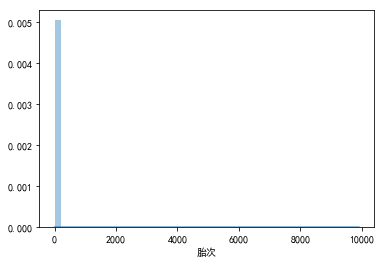

In [17]:
sns.distplot(p0['胎次'])

由上胎次分布图可知胎次异常数据多

In [18]:
c0.count()

牛号      5814265
胎次      5814265
产犊日期    5796187
场号      5814265
dtype: int64

## 先将原始数据进行清洗整合，整理出各个数据集按照年做一个分布图

### 出生数据

1.删除缺失值，提取年，月效应

In [19]:
b1=b0.dropna(axis=0,how='any') ##删除空值 
b1.count()

牛号      2788162
出生日期    2788162
场号      2788162
dtype: int64

In [20]:
b1['yearb']=list(map(lambda s: s.split('/')[0],b1['出生日期']))
b1['monthb']=list(map(lambda s: s.split('/')[1],b1['出生日期']))
b1['YMB']=list(map(lambda s: s.split('/')[0]+s.split('/')[1],b1['出生日期']))
b1['HYB']=list(map(lambda s: str(s),b1['场号']))+b1['yearb']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

发现一些年份数据有错误，如1900，5002等，根据数据分布对年效应进行质控，区间[1990,2018]

In [21]:
b1['yearb']=list(map(lambda s:int(s),b1['yearb']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
b2=b1[(b1['yearb'] >=1990)&(b1['yearb'] <=2018)]

2.以年效应画数据分布图

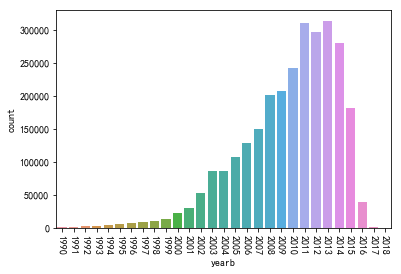

In [23]:
yb=sns.countplot(x="yearb", data=b2)
yb1=yb.set_xticklabels(yb.get_xticklabels(), rotation=-90)

In [24]:
yb2=yb.get_figure()
yb2.savefig('F:\\Python\\yb.png',bbox_inches='tight',dpi=500)

### 配种数据

1.删除缺失值，提取年，月效应

In [25]:
p1=p0.dropna(axis=0,how='any') ##删除空值 
p1.count()

牛号      763984
胎次      763984
配种日期    763984
场号      763984
dtype: int64

In [26]:
p1['yearp']=list(map(lambda s: s.split('/')[0],p1['配种日期']))
p1['monthp']=list(map(lambda s: s.split('/')[1],p1['配种日期']))
p1['YMI']=list(map(lambda s: s.split('/')[0]+s.split('/')[1],p1['配种日期']))
p1['HYI']=list(map(lambda s: str(s),p1['场号']))+p1['yearp']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

根据配种数据按年效应的分布，选择年效应区间[2000,2018]。

In [27]:
p1['yearp']=list(map(lambda s:int(s),p1['yearp']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
p2=p1[(p1['yearp'] >=2000)&(p1['yearp'] <=2018)]

2.以年，胎次效应画数据分布图

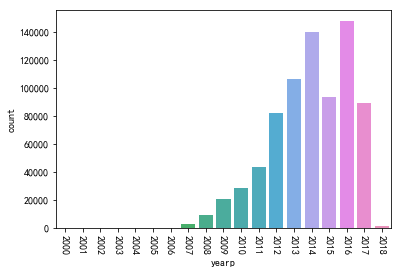

In [29]:
yp=sns.countplot(x="yearp", data=p2)
yp1=yp.set_xticklabels(yp.get_xticklabels(), rotation=-90)

In [30]:
yp2=yp.get_figure()
yp2.savefig('F:\\Python\\yp.png',bbox_inches='tight',dpi=500)

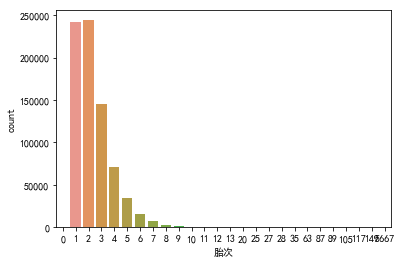

In [31]:
yp3=sns.countplot(x='胎次',data=p2)

### 初配数据

In [32]:
cp1=cp0.dropna(axis=0,how='any') ##删除空值 
cp1.count()

牛号      561280
胎次      561280
初配日期    561280
场号      561280
dtype: int64

In [33]:
cp1['yearp']=list(map(lambda s: s.split('/')[0],cp1['初配日期']))
cp1['monthp']=list(map(lambda s: s.split('/')[1],cp1['初配日期']))
cp1['YMI']=list(map(lambda s: s.split('/')[0]+s.split('/')[1],cp1['初配日期']))
cp1['HYI']=list(map(lambda s: str(s),cp1['场号']))+cp1['yearp']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [34]:
cp1['yearp']=list(map(lambda s:int(s),cp1['yearp']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
cp2=cp1[(cp1['yearp'] >=2000)&(cp1['yearp'] <=2018)]

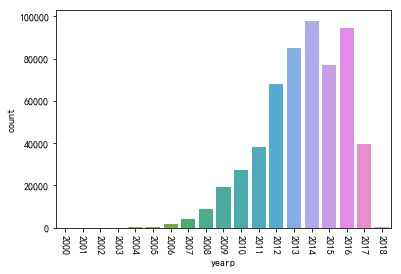

In [36]:
ycp=sns.countplot(x="yearp", data=cp2)
ycp1=ycp.set_xticklabels(ycp.get_xticklabels(), rotation=-90)

In [37]:
ycp2=ycp.get_figure()
ycp2.savefig('F:\\Python\\ycp.png',bbox_inches='tight',dpi=500)

初配日期数据为各牛只最早配种时间

### 配种次数数据

In [38]:
pc1=pc0.dropna(axis=0,how='any') ##删除空值 
pc1.count()

牛号      502589
胎次      502589
配次      502589
配种日期    502589
场号      502589
dtype: int64

In [39]:
pc1['yearp']=list(map(lambda s: s.split('/')[0],pc1['配种日期']))
pc1['monthp']=list(map(lambda s: s.split('/')[1],pc1['配种日期']))
pc1['YMI']=list(map(lambda s: s.split('/')[0]+s.split('/')[1],pc1['配种日期']))
pc1['HYI']=list(map(lambda s: str(s),pc1['场号']))+pc1['yearp']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

检查配种次数的分布

In [40]:
pc2=pc1[(pc1['配次'] >=0)&(pc1['配次'] <=20)]

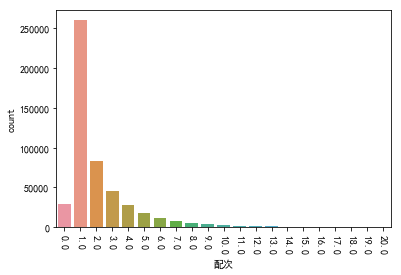

In [41]:
ypc=sns.countplot(x="配次", data=pc2)
ypc1=ypc.set_xticklabels(ypc.get_xticklabels(), rotation=-90)

之后验证配次对应的配种日期与后一胎次产犊日期的关系，若后一胎产犊比配种时间大200-365天，则确定该数据为胎次最后配种时间。

In [42]:
ypc2=ypc.get_figure()
ypc2.savefig('F:\\Python\\ypc.png',bbox_inches='tight',dpi=500)

In [43]:
pcg=pc1[(pc1['配次'] >=1)&(pc1['配次'] <=8)]

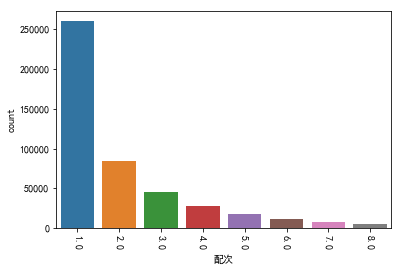

In [44]:
ypcg=sns.countplot(x="配次", data=pcg)
ypcg1=ypcg.set_xticklabels(ypcg.get_xticklabels(), rotation=-90)

In [45]:
pcg.describe()

胎次             配次
count  459972.000000  459972.000000
mean        2.192018       2.027806
std         8.469125       1.584439
min         0.000000       1.000000
25%         1.000000       1.000000
50%         2.000000       1.000000
75%         3.000000       3.000000
max      5667.000000       8.000000

### 产犊数据

1.删除缺失值，提取年，月效应

In [46]:
c1=c0.dropna(axis=0,how='any') ##删除空值 
c1.count()

牛号      5796187
胎次      5796187
产犊日期    5796187
场号      5796187
dtype: int64

In [47]:
c1['yearc']=list(map(lambda s: s.split('/')[0],c1['产犊日期']))
c1['monthc']=list(map(lambda s: s.split('/')[1],c1['产犊日期']))
c1['YMC']=list(map(lambda s: s.split('/')[0]+s.split('/')[1],c1['产犊日期']))
c1['HYC']=list(map(lambda s: str(s),c1['场号']))+c1['yearc']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

根据年效应分布可以看出有很多1900年的异常值，先统计异常值数量

In [48]:
c1['yearc']=list(map(lambda s:int(s),c1['yearc']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
ctest=c1[(c1['yearc'] >=1900)&(c1['yearc'] <=1990)]

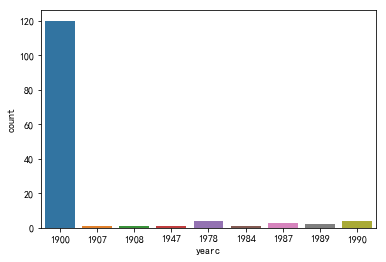

In [50]:
ct=sns.countplot(x="yearc", data=ctest)

异常值数量可以接受，确定作图区间为[1990,2018]

In [51]:
c2=c1[(c1['yearc'] >=1990)&(c1['yearc'] <=2018)]

2.以年效应作图

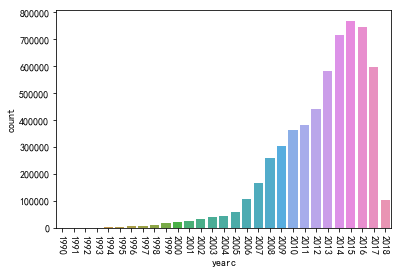

In [52]:
yc=sns.countplot(x="yearc", data=c2)
yc1=yc.set_xticklabels(yc.get_xticklabels(), rotation=-90)

In [53]:
yc2=yc.get_figure()
yc2.savefig('F:\\Python\\yc.png',bbox_inches='tight',dpi=500)

### 各数据集提取固定效应

In [54]:
bb=b2[['牛号','场号','yearb','monthb','HYB','YMB']]
bb.head()

牛号      场号  yearb monthb         HYB    YMB
0  110001000001  110001   2000      1  1100012000  20001
1  110001000003  110001   2000      1  1100012000  20001
2  110001000006  110001   2000      1  1100012000  20001
3  110001000007  110001   2000      1  1100012000  20001
4  110001000008  110001   2000      1  1100012000  20001

In [55]:
pp=p2[['牛号','胎次','场号','yearp','monthp','HYI','YMI']]
pp.head()

牛号  胎次      场号  yearp monthp         HYI    YMI
892  110001009001   2  110001   2011      6  1100012011  20116
929  110001009041   2  110001   2011      7  1100012011  20117
934  110001009048   2  110001   2011      8  1100012011  20118
950  110001009055   2  110001   2011      8  1100012011  20118
963  110001009068   2  110001   2011      7  1100012011  20117

In [56]:
cc=c2[['牛号','胎次','场号','yearc','monthc','HYC','YMC']]
cc.head()

牛号  胎次      场号  yearc monthc         HYC    YMC
0  110001000001   1  110001   2002      1  1100012002  20021
1  110001000003   1  110001   2002      1  1100012002  20021
2  110001000006   1  110001   2002      3  1100012002  20023
3  110001000007   1  110001   2002      7  1100012002  20027
4  110001000008   1  110001   2002      3  1100012002  20023

# 各个性状的提取

## 初配日龄AFS

初配日龄为青年牛性状，其意为每头牛首次配种的日期与其出生日期之差（单位：天）。计算时首先筛选出每头牛首次配种的时间，再与出生事件中各牛的出生日期相减即可。

### 首次配种日期筛选

In [57]:
cpp=cp2[['牛号','初配日期']]

In [58]:
cpp.head()

牛号       初配日期
892  110001009001  2011/2/25
929  110001009041   2011/7/8
934  110001009048   2011/8/8
950  110001009055   2011/8/8
963  110001009068  2011/7/25

### 出生日期筛选

In [59]:
b3=b2[['牛号','出生日期']]
b3.head()

牛号       出生日期
0  110001000001   2000/1/6
1  110001000003  2000/1/10
2  110001000006  2000/1/16
3  110001000007  2000/1/21
4  110001000008  2000/1/20

### 计算AFS

In [60]:
bp=pd.merge(b3,cpp,on="牛号")
bp.head()

牛号       出生日期       初配日期
0  110001009001   2009/1/6  2011/2/25
1  110001009041  2009/3/29   2011/7/8
2  110001009048   2009/4/6   2011/8/8
3  110001009055  2009/4/25   2011/8/8
4  110001009068  2009/5/15  2011/7/25

In [61]:
cp2.head()

牛号  胎次       初配日期      场号  yearp monthp    YMI         HYI
892  110001009001   2  2011/2/25  110001   2011      2  20112  1100012011
929  110001009041   2   2011/7/8  110001   2011      7  20117  1100012011
934  110001009048   2   2011/8/8  110001   2011      8  20118  1100012011
950  110001009055   2   2011/8/8  110001   2011      8  20118  1100012011
963  110001009068   2  2011/7/25  110001   2011      7  20117  1100012011

In [62]:
bp['出生日期']=pd.to_datetime(bp['出生日期'],format="%Y-%m-%d")  #转换为日期格式
bp['初配日期']=pd.to_datetime(bp['初配日期'],format="%Y-%m-%d")
AFS=bp
AFS.head()

牛号       出生日期       初配日期
0  110001009001 2009-01-06 2011-02-25
1  110001009041 2009-03-29 2011-07-08
2  110001009048 2009-04-06 2011-08-08
3  110001009055 2009-04-25 2011-08-08
4  110001009068 2009-05-15 2011-07-25

In [63]:
AFS['AFS']=AFS['初配日期']-AFS['出生日期']
AFS['AFS']=list(map(lambda s: s.days,AFS['AFS']))  ##timedelta通过.days提取出int格式整数
AFS.count()

牛号      558963
出生日期    558963
初配日期    558963
AFS     558963
dtype: int64

In [64]:
AFSS=AFS[(AFS['AFS'] >=270)&(AFS['AFS'] <=900)]

In [65]:
AFSS.describe()

AFS
count  356029.000000
mean      558.552250
std       153.289277
min       270.000000
25%       441.000000
50%       498.000000
75%       661.000000
max       900.000000

In [66]:
AFSS.head()

牛号       出生日期       初配日期  AFS
0  110001009001 2009-01-06 2011-02-25  780
1  110001009041 2009-03-29 2011-07-08  831
2  110001009048 2009-04-06 2011-08-08  854
3  110001009055 2009-04-25 2011-08-08  835
4  110001009068 2009-05-15 2011-07-25  801

In [67]:
AFSS1=AFSS[['牛号','AFS']]

### 效应合并

共整理出初配日龄521,727条数据，将性状数据与年月效应合并

In [68]:
AFS1=pd.merge(AFS,bb,on='牛号')
AFS1.count()

牛号        558963
出生日期      558963
初配日期      558963
AFS       558963
场号        558963
yearb     558963
monthb    558963
HYB       558963
YMB       558963
dtype: int64

In [69]:
cp3=cp2[['牛号','yearp','monthp','HYI','YMI']]
AFS2=pd.merge(AFS1,cp3,on='牛号').drop_duplicates(subset=['牛号','HYB'],keep='first')
AFS2.count()

牛号        398905
出生日期      398905
初配日期      398905
AFS       398905
场号        398905
yearb     398905
monthb    398905
HYB       398905
YMB       398905
yearp     398905
monthp    398905
HYI       398905
YMI       398905
dtype: int64

## 初产日龄AFC

初产日龄为青年牛性状，当每头牛胎次为1时即为第一次产犊，产犊的日期与该牛出生日期之差（单位：天）即为初产日龄性状。

计算方法：先从产犊事件中筛选出各牛最早的产犊日期，再与出生事件中各牛出生日期相减即可。

### 初产日期筛选

In [70]:
c3=c2['产犊日期'].groupby([c2['牛号']]).min()

In [71]:
c4=pd.DataFrame(c3)
c4.head()

产犊日期
牛号                     
110001000001  2002/1/19
110001000003  2002/1/18
110001000006  2002/3/25
110001000007  2002/7/12
110001000008   2002/3/4

### 与出生日期配对并计算AFC

In [72]:
bc=pd.merge(b3,c4,left_on='牛号',right_index=True,how='left')
bc.head()

牛号       出生日期       产犊日期
0  110001000001   2000/1/6  2002/1/19
1  110001000003  2000/1/10  2002/1/18
2  110001000006  2000/1/16  2002/3/25
3  110001000007  2000/1/21  2002/7/12
4  110001000008  2000/1/20   2002/3/4

In [73]:
bc['出生日期']=pd.to_datetime(bc['出生日期'],format="%Y-%m-%d")
bc['产犊日期']=pd.to_datetime(bc['产犊日期'],format="%Y-%m-%d")
AFC=bc
AFC.head()

牛号       出生日期       产犊日期
0  110001000001 2000-01-06 2002-01-19
1  110001000003 2000-01-10 2002-01-18
2  110001000006 2000-01-16 2002-03-25
3  110001000007 2000-01-21 2002-07-12
4  110001000008 2000-01-20 2002-03-04

In [74]:
AFC['AFC']=AFC['产犊日期']-AFC['出生日期']
AFC['AFC']=list(map(lambda s: s.days,AFC['AFC']))  ##timedelta通过.days提取出int格式整数
AFC.count()

牛号      2786869
出生日期    2786869
产犊日期    2786103
AFC     2786103
dtype: int64

In [75]:
AFCC=AFC[(AFC['AFC'] >=600)&(AFC['AFC'] <=1100)]

In [76]:
AFCC1=AFCC[['牛号','AFC']]

In [77]:
AFCC1.count()

牛号     2048679
AFC    2048679
dtype: int64

### 效应合并

共获得AFC数据2,151,811条，将其与对应年月效应合并

In [78]:
AFC1=pd.merge(AFC,bb,on='牛号')
AFC1.count()

牛号        2786869
出生日期      2786869
产犊日期      2786103
AFC       2786103
场号        2786869
yearb     2786869
monthb    2786869
HYB       2786869
YMB       2786869
dtype: int64

In [79]:
cch=c2[['牛号','yearc','monthc','HYC','YMC']]
AFC2=pd.merge(AFC1,cch,on='牛号').drop_duplicates(subset=['牛号','HYB'],keep='first')
AFC2.count()

牛号        2786103
出生日期      2786103
产犊日期      2786103
AFC       2786103
场号        2786103
yearb     2786103
monthb    2786103
HYB       2786103
YMB       2786103
yearc     2786103
monthc    2786103
HYC       2786103
YMC       2786103
dtype: int64

## 产后首次配种间隔ICF

产后首次配种间隔是经产牛性状，其计算需要每头牛每个胎次的首次配种时间，以及各个胎次对应的产犊时间，利用首次配种时间与产犊时间相减即可得到ICF。

### 各胎次产犊时间的筛选

In [80]:
c5=c2[['牛号','胎次','产犊日期']]
c6=c5
c6['胎次']=list(map(lambda s: str(s),c6['胎次']))  #胎次数据转化为字符串便于处理

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
c6['cowtai']=c6['牛号']+'.'+c6['胎次']
c6.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


牛号 胎次       产犊日期          cowtai
0  110001000001  1  2002/1/19  110001000001.1
1  110001000003  1  2002/1/18  110001000003.1
2  110001000006  1  2002/3/25  110001000006.1
3  110001000007  1  2002/7/12  110001000007.1
4  110001000008  1   2002/3/4  110001000008.1

### 各胎次首次配种时间筛选

In [82]:
cp3=cp2[['牛号','胎次','初配日期']]
cp4=cp3
cp4['胎次']=list(map(lambda s: str(s),cp4['胎次']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
cp4['cowtai']=cp4['牛号']+'.'+cp4['胎次']
cp4.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


牛号 胎次       初配日期          cowtai
892  110001009001  2  2011/2/25  110001009001.2
929  110001009041  2   2011/7/8  110001009041.2
934  110001009048  2   2011/8/8  110001009048.2
950  110001009055  2   2011/8/8  110001009055.2
963  110001009068  2  2011/7/25  110001009068.2

In [84]:
cp6=cp4
cp6['初配日期']=pd.to_datetime(cp6['初配日期'],format="%Y-%m-%d")

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 配种次数数据集验证

#### 胎次数据筛选

In [85]:
pc3=pc2
pc3['胎次']=list(map(lambda s: int(s),pc3['胎次']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
pc4=pc3
pc4=pc4[(pc4['胎次'] >=0)&(pc4['胎次'] <=12)]

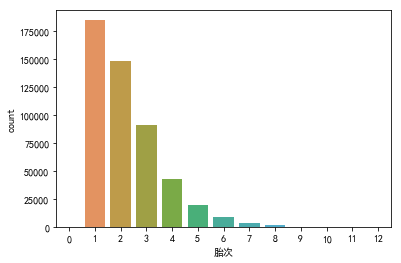

In [87]:
sns.countplot(x='胎次',data=pc4)

In [88]:
c7=c6
c7['胎次']=list(map(lambda s: int(s),c7['胎次']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
c8=c7
c8=c8[(c8['胎次'] >=1)&(c8['胎次'] <=12)]

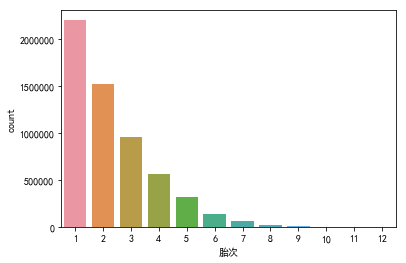

In [90]:
sns.countplot(x='胎次',data=c8)

In [91]:
c9=c7[c7['胎次']==0]
c9.count()

牛号        26
胎次        26
产犊日期      26
cowtai    26
dtype: int64

#### 产犊与配次数据匹配

In [92]:
c10=c8
c10['胎次']=list(map(lambda s: str(s),c10['胎次']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
c10['cowtai']=c10['牛号']+'.'+c10['胎次']
c10.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


牛号 胎次       产犊日期          cowtai
0  110001000001  1  2002/1/19  110001000001.1
1  110001000003  1  2002/1/18  110001000003.1
2  110001000006  1  2002/3/25  110001000006.1
3  110001000007  1  2002/7/12  110001000007.1
4  110001000008  1   2002/3/4  110001000008.1

In [94]:
pc5=pc4
pc5['胎次']=list(map(lambda s: str(s),pc5['胎次']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
pc5['cowtai']=pc5['牛号']+'.'+pc5['胎次']
pc5.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


牛号 胎次   配次       配种日期      场号 yearp monthp    YMI         HYI  \
892  110001009001  2  0.0  2011/6/15  110001  2011      6  20116  1100012011   
929  110001009041  2  0.0   2011/7/8  110001  2011      7  20117  1100012011   
934  110001009048  2  0.0   2011/8/8  110001  2011      8  20118  1100012011   
950  110001009055  2  0.0   2011/8/8  110001  2011      8  20118  1100012011   
963  110001009068  2  0.0  2011/7/25  110001  2011      7  20117  1100012011   

             cowtai  
892  110001009001.2  
929  110001009041.2  
934  110001009048.2  
950  110001009055.2  
963  110001009068.2

In [96]:
pc6=pc5[['cowtai','配种日期']]
c11=c10[['cowtai','产犊日期']]

In [97]:
valid=pd.merge(c11,pc6,on='cowtai')

In [98]:
valid['配种日期']=pd.to_datetime(valid['配种日期'],format="%Y-%m-%d")
valid['产犊日期']=pd.to_datetime(valid['产犊日期'],format="%Y-%m-%d")

In [99]:
valid['valid']=valid['产犊日期']-valid['配种日期']
valid['valid']=list(map(lambda s: s.days,valid['valid']))  ##timedelta通过.days提取出int格式整数
valid.head()

cowtai       产犊日期       配种日期  valid
0  110001009001.2 2012-05-01 2011-06-15    321
1  110001009041.2 2012-04-26 2011-07-08    293
2  110001009048.2 2012-05-15 2011-08-08    281
3  110001009055.2 2012-05-18 2011-08-08    284
4  110001009068.2 2012-04-23 2011-07-25    273

In [100]:
valid1=valid
valid1=valid1[(valid1['valid'] >=200)&(valid1['valid'] <=360)]

In [101]:
valid1.describe()

valid
count  489298.000000
mean      274.378352
std        15.408607
min       200.000000
25%       272.000000
50%       277.000000
75%       281.000000
max       360.000000

<span class="burk">最终如上图所示可得到489,298条数据，同时也说明产犊数据胎次与配种数据胎次相差一胎（产犊数据为上一胎：例如，1胎产犊时间标的胎次为1胎）。配次数据中的配种日期即为每胎配种的末配日期。</span>

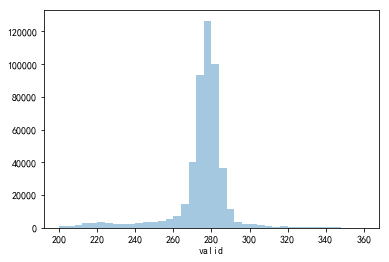

In [102]:
sns.distplot(valid1['valid'], kde=False,bins=40)

### 产犊配种数据合并计算ICF

#### 计算首次配种即配上的ICF

筛选出每胎次只配种一次的牛只数据

In [103]:
pcc1=pc5[pc5['配次']==1]

In [104]:
pcc1.head()

牛号 胎次   配次        配种日期      场号 yearp monthp     YMI  \
26056  110010201304  8  1.0  2011/12/12  110010  2011     12  201112   
52918  110015008172  3  1.0   2012/5/26  110015  2012      5   20125   
53889  110015008627  2  1.0    2012/7/6  110015  2012      7   20127   
54399  110015009131  2  1.0   2012/4/22  110015  2012      4   20124   
54932  110015009363  2  1.0   2012/5/19  110015  2012      5   20125   

              HYI          cowtai  
26056  1100102011  110010201304.8  
52918  1100152012  110015008172.3  
53889  1100152012  110015008627.2  
54399  1100152012  110015009131.2  
54932  1100152012  110015009363.2

In [105]:
pcc2=pcc1[['牛号','cowtai','配次','配种日期','胎次']]

In [106]:
pcc2.count()

牛号        260156
cowtai    260156
配次        260156
配种日期      260156
胎次        260156
dtype: int64

配种数据减去一个胎次

In [107]:
cc=c6[['cowtai','产犊日期']]

In [108]:
pcc2['胎次']=list(map(lambda s:int(s),pcc2['胎次']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
pcc2['胎次']=list(map(lambda s:s-1,pcc2['胎次']))
pcc2.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


牛号          cowtai   配次        配种日期  胎次
26056  110010201304  110010201304.8  1.0  2011/12/12   7
52918  110015008172  110015008172.3  1.0   2012/5/26   2
53889  110015008627  110015008627.2  1.0    2012/7/6   1
54399  110015009131  110015009131.2  1.0   2012/4/22   1
54932  110015009363  110015009363.2  1.0   2012/5/19   1

In [110]:
pcc2['胎次']=list(map(lambda s:str(s),pcc2['胎次']))
pcc2['cowtai']=pcc2['牛号']+'.'+pcc2['胎次']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
pcc3=pcc2[['cowtai','配种日期']]
pcm=pd.merge(pcc3,cc,on='cowtai')
pcm.head()

cowtai        配种日期       产犊日期
0  110010201304.7  2011/12/12  2011/7/13
1  110015008172.2   2012/5/26   2011/6/3
2  110015008627.1    2012/7/6  2010/12/3
3  110015009131.1   2012/4/22  2011/3/29
4  110015009363.1   2012/5/19  2011/9/19

In [112]:
pcm.describe()

cowtai        配种日期      产犊日期
count           132818      132818    132818
unique          132818        3934      4042
top     13rh04120745.1  2016/12/16  2014/1/1
freq                 1         387       229

In [113]:
pcm['配种日期']=pd.to_datetime(pcm['配种日期'],format="%Y-%m-%d")
pcm['产犊日期']=pd.to_datetime(pcm['产犊日期'],format="%Y-%m-%d")

In [114]:
pcm['valid']=pcm['配种日期']-pcm['产犊日期']
pcm['valid']=list(map(lambda s: s.days,pcm['valid'])) 

In [115]:
pcm1=pcm
pcm1.head()

cowtai       配种日期       产犊日期  valid
0  110010201304.7 2011-12-12 2011-07-13    152
1  110015008172.2 2012-05-26 2011-06-03    358
2  110015008627.1 2012-07-06 2010-12-03    581
3  110015009131.1 2012-04-22 2011-03-29    390
4  110015009363.1 2012-05-19 2011-09-19    243

In [116]:
pcm.describe()

valid
count  132818.000000
mean      121.022693
std       152.028555
min    -25017.000000
25%        64.000000
50%        86.000000
75%       147.000000
max      2333.000000

In [117]:
pcm1=pcm1[(pcm1['valid'] >=20)&(pcm1['valid'] <=230)]
pcm1.describe()

valid
count  114944.000000
mean       95.103546
std        44.836943
min        20.000000
25%        63.000000
50%        79.000000
75%       117.000000
max       230.000000

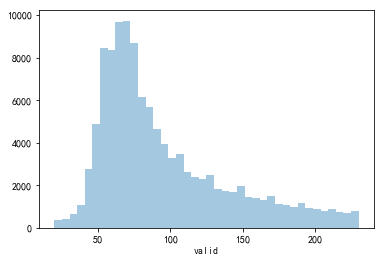

In [118]:
sns.distplot(pcm1['valid'],kde=False,bins=40)

In [119]:
pcm1.rename(columns={'valid':'ICF1'},inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [120]:
icf=pcm1
icf.head()

cowtai       配种日期       产犊日期  ICF1
0   110010201304.7 2011-12-12 2011-07-13   152
6   110015011111.4 2017-05-12 2016-12-09   154
7   110015011283.1 2013-12-30 2013-06-20   193
10  110015130180.3 2017-10-02 2017-05-01   154
11  110015130467.2 2017-10-10 2017-04-28   165

数据质控后筛除了20,000余条数据，即首次配种即配上的数据有114,944条，后续可作为无首次配种日期数据的罚项。但原始首次配种即配上的数据在250,000左右。经过验证发现丢失数据大多是青年牛末次配种数据，根据首次配种日期可计算部分青年牛的首末配种间隔（IFL）。

#### 提取青年牛首次配种即配上的数据

In [121]:
pch=pcc2[pcc2['胎次']=='0']

In [122]:
pch.describe()

配次
count  123888.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0

可以看到青年牛首次配种就配上的数据有123，888条

#### 计算多次配种的ICF

In [123]:
pcd=pc5[pc5['配次']>1]

In [124]:
pcd['胎次']=list(map(lambda s:int(s),pcd['胎次']))
pcd['胎次']=list(map(lambda s:s-1,pcd['胎次']))
pcd.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


牛号  胎次   配次       配种日期      场号 yearp monthp     YMI  \
844724  13a003050003   9  3.0  2016/7/12  13a003  2016      7   20167   
844876  13a003080027   3  2.0  2014/1/26  13a003  2014      1   20141   
845035  13a003090032   2  2.0  2015/1/11  13a003  2015      1   20151   
845252  13a003110016   3  3.0   2016/6/6  13a003  2016      6   20166   
845266  13a003110030   1  2.0  2014/10/1  13a003  2014     10  201410   

               HYI           cowtai  
844724  13a0032016  13a003050003.10  
844876  13a0032014   13a003080027.4  
845035  13a0032015   13a003090032.3  
845252  13a0032016   13a003110016.4  
845266  13a0032014   13a003110030.2

In [125]:
pcd['胎次']=list(map(lambda s:str(s),pcd['胎次']))
pcd['cowtai']=pcd['牛号']+'.'+pcd['胎次']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [126]:
pcd1=pcd[['牛号','胎次','配次','cowtai','配种日期']]

In [127]:
pcd1['胎次']=list(map(lambda s:int(s),pcd1['胎次']))
pcd2=pcd1[pcd1['胎次']>0]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
pcd2.count()

牛号        155787
胎次        155787
配次        155787
cowtai    155787
配种日期      155787
dtype: int64

In [129]:
pcd1.count()

牛号        213398
胎次        213398
配次        213398
cowtai    213398
配种日期      213398
dtype: int64

可见经产牛中多次配种的数据为155，787条，青年牛中有将近60，000条。是否能用首次即配上的平均天数作为罚项有待讨论。

In [130]:
pcd2.head()

牛号  胎次   配次          cowtai       配种日期
844724  13a003050003   9  3.0  13a003050003.9  2016/7/12
844876  13a003080027   3  2.0  13a003080027.3  2014/1/26
845035  13a003090032   2  2.0  13a003090032.2  2015/1/11
845252  13a003110016   3  3.0  13a003110016.3   2016/6/6
845266  13a003110030   1  2.0  13a003110030.1  2014/10/1

In [131]:
icf2=pcd2[['cowtai']]
icf2['ICF1']=95

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [132]:
icf1=icf[['cowtai','ICF1']]

In [133]:
ICF=pd.concat([icf1,icf2])

### 效应计算

## 首末配种间隔IFL

首末配种间隔为青年牛与经产牛共有的性状之一。计算IFL时需先提取牛只每个胎次内第一次配种和最后一次配种的时间，之后相减即可。若首配就配上，则IFL=0

根据之前ICF的计算，经产牛首次配种即配上的平均日龄为95.10天（114,944条），经产牛多次配种数据为155,787条。平均日龄作为罚项时，胎次产犊时间加上罚项之后，用末次配种时间与其相减则可得到IFL。但是否能作为罚项还需要讨论（数据相对较少）。青年牛IFL可以使用初配时间与末次配种时间相减即可。

### 经产牛IFL的计算

In [134]:
import datetime as dt

In [135]:
c6['产犊日期']=pd.to_datetime(c6['产犊日期'],format="%Y-%m-%d")

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
cifl=c6
cifl['首次配种罚项']=cifl['产犊日期']+ dt.timedelta(days = 95)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [137]:
cifl.head()

牛号  胎次       产犊日期          cowtai     首次配种罚项
0  110001000001   1 2002-01-19  110001000001.1 2002-04-24
1  110001000003   1 2002-01-18  110001000003.1 2002-04-23
2  110001000006   1 2002-03-25  110001000006.1 2002-06-28
3  110001000007   1 2002-07-12  110001000007.1 2002-10-15
4  110001000008   1 2002-03-04  110001000008.1 2002-06-07

In [138]:
cifl1=cifl
cifl1['胎次']=list(map(lambda s:int(s),cifl1['胎次']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
cifl2=cifl1.copy()

In [140]:
cifl2['胎次']=list(map(lambda s:str(s),cifl2['胎次']))
cifl2['cowtai']=cifl2['牛号']+'.'+cifl2['胎次']

In [141]:
cifl2.head()

牛号 胎次       产犊日期          cowtai     首次配种罚项
0  110001000001  1 2002-01-19  110001000001.1 2002-04-24
1  110001000003  1 2002-01-18  110001000003.1 2002-04-23
2  110001000006  1 2002-03-25  110001000006.1 2002-06-28
3  110001000007  1 2002-07-12  110001000007.1 2002-10-15
4  110001000008  1 2002-03-04  110001000008.1 2002-06-07

In [142]:
pcd3=pcd2[['cowtai','配种日期']]

In [143]:
pcifl=pd.merge(cifl2,pcd3,on='cowtai')

In [144]:
pcifl['配种日期']=pd.to_datetime(pcifl['配种日期'],format="%Y-%m-%d")
pcifl.head()

牛号 胎次       产犊日期          cowtai     首次配种罚项       配种日期
0  13a003080027  3 2013-01-28  13a003080027.3 2013-05-03 2014-01-26
1  13a003090032  2 2012-02-04  13a003090032.2 2012-05-09 2015-01-11
2  13a003110016  3 2015-08-04  13a003110016.3 2015-11-07 2016-06-06
3  13a003110030  1 2014-03-05  13a003110030.1 2014-06-08 2014-10-01
4  13a003111070  4 2016-01-20  13a003111070.4 2016-04-24 2016-06-26

In [145]:
pcifl['IFL']=pcifl['配种日期']-pcifl['首次配种罚项']
pcifl['IFL']=list(map(lambda s: s.days,pcifl['IFL']))

In [146]:
pcifl.describe()

IFL
count  151767.000000
mean       72.676043
std       130.980250
min     -6023.000000
25%        -5.000000
50%        40.000000
75%       120.000000
max      2253.000000

In [147]:
pcifl1=pcifl[(pcifl['IFL']<366)&(pcifl['IFL']>=25)]

In [148]:
pcifl1.describe()

IFL
count  83005.000000
mean     121.309042
std       83.237051
min       25.000000
25%       54.000000
50%       96.000000
75%      171.000000
max      365.000000

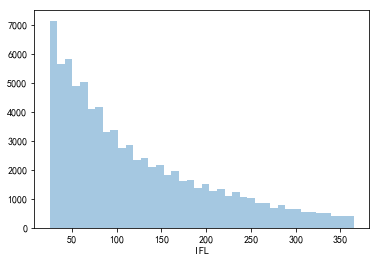

In [149]:
pci=sns.distplot(pcifl1['IFL'],bins=40,kde=False)

以与罚项差值=25天为临界点，计算得到经产牛IFL数据83，005条。

目前需要考虑的一个问题：如果罚项加的天数之后，其大于牛胎次内末次配种的日期，则会出现负值或比较小的值。所以应先统计产犊日期与配种日期之差小于95+25天的个体。

In [150]:
pcifl['valid']=pcifl['配种日期']-pcifl['产犊日期']
pcifl['valid']=list(map(lambda s: s.days,pcifl['valid']))

In [151]:
pciflv=pcifl.copy()

In [152]:
pciflv=pciflv[(pciflv['valid']<=120)&(pciflv['valid']>=0)]

In [153]:
pciflv.describe()

IFL         valid
count  64220.000000  64220.000000
mean     -11.212551     83.787449
std       21.798450     21.798450
min      -95.000000      0.000000
25%      -28.000000     67.000000
50%      -11.000000     84.000000
75%        7.000000    102.000000
max       25.000000    120.000000

可见有64,420条数据在罚项的范围内，如何处理这些数据？

### 青年牛IFL的计算

In [154]:
pcd4=pcd1[pcd1['胎次']==0]

In [155]:
pcd4.describe()

胎次            配次
count  57610.0  57610.000000
mean       0.0      2.901198
std        0.0      1.477011
min        0.0      2.000000
25%        0.0      2.000000
50%        0.0      2.000000
75%        0.0      3.000000
max        0.0     19.000000

由上可知青年牛末配数据为57,610条。

In [156]:
iflh=pd.merge(pcd4,cpp,on='牛号')

In [157]:
iflh.head()

牛号  胎次   配次          cowtai        配种日期       初配日期
0  13a003110046   0  2.0  13a003110046.0  2014/11/20   2014/3/5
1  13a003120084   0  2.0  13a003120084.0    2014/5/9  2013/11/8
2  13a003120090   0  2.0  13a003120090.0  2014/10/10   2014/3/4
3  13a003130004   0  2.0  13a003130004.0  2014/11/10   2014/9/3
4  13a003130036   0  2.0  13a003130036.0   2014/11/5  2014/8/18

In [158]:
iflh['配种日期']=pd.to_datetime(iflh['配种日期'],format="%Y-%m-%d")
iflh['初配日期']=pd.to_datetime(iflh['初配日期'],format="%Y-%m-%d")

In [159]:
iflhv=iflh.copy()

In [160]:
iflhv['IFL']=iflhv['配种日期']-iflhv['初配日期']
iflhv['IFL']=list(map(lambda s:s.days,iflhv['IFL']))

In [161]:
iflhv=iflhv[((iflhv['IFL']<=365)&(iflhv['IFL']>=25))|(iflhv['IFL']==0)]

In [162]:
iflhv.describe()

胎次            配次           IFL
count  48765.0  48765.000000  48765.000000
mean       0.0      3.098821     87.890044
std        0.0      1.405580     75.863761
min        0.0      2.000000      0.000000
25%        0.0      2.000000     40.000000
50%        0.0      3.000000     63.000000
75%        0.0      4.000000    114.000000
max        0.0     18.000000    365.000000

以IFL>=25为阈值，最后可得48,765(43,852+4913)条有效范围内的青年牛IFL。

### 仅配种一次的数据计算IFL

In [163]:
pce=pc5[pc5['配次']==1]

In [164]:
pce['胎次']=list(map(lambda s:int(s),pce['胎次']))
pce['胎次']=list(map(lambda s:s-1,pce['胎次']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [165]:
pce1=pce[pce['胎次']==0]
pce2=pce[pce['胎次']>0]

In [166]:
print(pce1.describe())
print('-'*10)
print(pce2.describe())

             胎次        配次
count  123888.0  123888.0
mean        0.0       1.0
std         0.0       0.0
min         0.0       1.0
25%         0.0       1.0
50%         0.0       1.0
75%         0.0       1.0
max         0.0       1.0
----------
                  胎次        配次
count  136268.000000  136268.0
mean        2.036296       1.0
std         1.276500       0.0
min         1.000000       1.0
25%         1.000000       1.0
50%         2.000000       1.0
75%         3.000000       1.0
max        11.000000       1.0


可见总共有123，888,+136,268条数据为首次配种即配上的数据，即IFL=0。接下来使用初配时间进行验证青年牛数据时，仅有4913条数据IFL=0，而且由于经产牛只有配日期数据，只能依靠配次=1来确定数据集IFL=0。

是否直接使用配次=1的数据作为首次配种即配上的数据？应该可以，因为ICF也可以验证：114,944条有效数据/136,268（84.35%）条首次配种即配上数据。

将配次=1的数据加上IFL=0一列

In [167]:
pce['胎次']=list(map(lambda s:str(s),pce['胎次']))
pce['cowtai']=pce['牛号']+'.'+pce['胎次']
pce['IFL']=0

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [168]:
pce.head()

牛号 胎次   配次        配种日期      场号 yearp monthp     YMI  \
26056  110010201304  7  1.0  2011/12/12  110010  2011     12  201112   
52918  110015008172  2  1.0   2012/5/26  110015  2012      5   20125   
53889  110015008627  1  1.0    2012/7/6  110015  2012      7   20127   
54399  110015009131  1  1.0   2012/4/22  110015  2012      4   20124   
54932  110015009363  1  1.0   2012/5/19  110015  2012      5   20125   

              HYI          cowtai  IFL  
26056  1100102011  110010201304.7    0  
52918  1100152012  110015008172.2    0  
53889  1100152012  110015008627.1    0  
54399  1100152012  110015009131.1    0  
54932  1100152012  110015009363.1    0

### 效应计算

共获得83,005（IFL_C多次配种，罚项），64,420（IFL_C多次配种，罚项范围内），48,765（IFL_H多次配种），260,156（IFL=0），总共456,346条IFL数据。

由于经产牛没有首次配种数据，使用罚项值作为其效应？那罚项范围内的数据如何定义首次配种时间？

In [169]:
ifl1=pce[['cowtai','IFL']]
ifl2=pcifl1[['cowtai','IFL']]
ifl3=iflhv[['cowtai','IFL']]

In [170]:
iflt=pd.concat([ifl1,ifl2,ifl3])

In [171]:
iflt.head()

cowtai  IFL
26056  110010201304.7    0
52918  110015008172.2    0
53889  110015008627.1    0
54399  110015009131.1    0
54932  110015009363.1    0

In [172]:
iflt1=iflt.drop_duplicates(keep='first')

In [173]:
iflt1.count()

cowtai    382244
IFL       382244
dtype: int64

# 验证配种次数数据，再次计算ICF和IFL

## 验证配种次数数据

__思路：计算同一胎次不同配次下，配次之间相差的平均时间__

In [174]:
pc5.head()

牛号 胎次   配次       配种日期      场号 yearp monthp    YMI         HYI  \
892  110001009001  2  0.0  2011/6/15  110001  2011      6  20116  1100012011   
929  110001009041  2  0.0   2011/7/8  110001  2011      7  20117  1100012011   
934  110001009048  2  0.0   2011/8/8  110001  2011      8  20118  1100012011   
950  110001009055  2  0.0   2011/8/8  110001  2011      8  20118  1100012011   
963  110001009068  2  0.0  2011/7/25  110001  2011      7  20117  1100012011   

             cowtai  
892  110001009001.2  
929  110001009041.2  
934  110001009048.2  
950  110001009055.2  
963  110001009068.2

In [175]:
pc_valid=pc5[['牛号','胎次','配次','配种日期']].sort_values(by='胎次')

In [176]:
pc_valid['胎次']=pc_valid['胎次'].apply(lambda s :int(s))
pc_valid['胎次']=pc_valid['胎次'].apply(lambda s :s-1)

In [177]:
pc_valid['胎次']=pc_valid['胎次'].apply(lambda s :str(s))
pc_valid['cowtai']=pc_valid['牛号']+'.'+pc_valid['胎次']

In [178]:
pc_valid.count()

牛号        502302
胎次        502302
配次        502302
配种日期      502302
cowtai    502302
dtype: int64

### 利用ICF验证

In [179]:
pcm_valid=pd.merge(pc_valid,cc,on='cowtai')

In [180]:
pcm_valid.count()

牛号        309713
胎次        309713
配次        309713
配种日期      309713
cowtai    309713
产犊日期      309713
dtype: int64

In [181]:
pcm_valid.sort_values(by='胎次').head()

牛号 胎次   配次        配种日期          cowtai        产犊日期
0      612004061095  0  2.0  2008/12/29  612004061095.0   2009/7/10
98156  210088105641  1  4.0   2012/12/2  210088105641.1   2012/10/8
98155  210088105424  1  5.0    2013/1/1  210088105424.1  2012/10/29
98154  210088105228  1  2.0    2013/1/3  210088105228.1   2012/11/3
98153  210088107281  1  4.0   2013/2/22  210088107281.1  2012/11/16

__计算不同胎次，不同配次下配种日期与产犊日期间隔大小进行比较__——选取前8次配种次数，4胎以后胎次合并

In [182]:
pcm_valid['配种日期']=pd.to_datetime(pcm_valid['配种日期'],format="%Y-%m-%d")
pcm_valid['产犊日期']=pd.to_datetime(pcm_valid['产犊日期'],format="%Y-%m-%d")

In [183]:
pcm_valid['P-C']=(pcm_valid['配种日期']-pcm_valid['产犊日期']).apply(lambda s:s.days)
pcm_valid['胎次']=pcm_valid['胎次'].apply(lambda s :int(s))
pcm_valid['胎次']=pcm_valid['胎次'].apply(lambda s : 4 if s>4 else s)

In [184]:
pcm_valid1=pcm_valid[(pcm_valid['P-C']>0 )&(pcm_valid['配次']>0)&(pcm_valid['配次']<=8)]
pcm_valid1['配次']=pcm_valid1['配次'].apply(lambda s :int(s))
#pcm_valid1['配次']=pcm_valid1['配次'].apply(lambda s : 8 if s>8 else s)
pcm_valid1.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


牛号  胎次  配次       配种日期          cowtai       产犊日期  P-C
1  44A004040083   4   2 2015-02-15  44A004040083.9 2014-10-22  116
2  32000400A272   4   2 2012-01-31  32000400A272.9 2011-10-09  114
3  640035030074   4   1 2013-10-16  640035030074.9 2013-06-18  120
4  310108006070   4   1 2017-01-01  310108006070.9 2016-10-23   70
5  44A004040168   4   1 2014-05-23  44A004040168.9 2014-02-04  108

In [185]:
pcm_valid1.count()

牛号        269853
胎次        269853
配次        269853
配种日期      269853
cowtai    269853
产犊日期      269853
P-C       269853
dtype: int64

In [186]:
pcm_valid3=pcm_valid1['P-C'].groupby([pcm_valid1['胎次'],pcm_valid1['配次']]).mean()
pcm_valid4=pcm_valid1['P-C'].groupby([pcm_valid1['胎次'],pcm_valid1['配次']]).count()
pcm_valid5=pcm_valid1['P-C'].groupby([pcm_valid1['配次']]).mean()
pcm_valid6=pcm_valid1['P-C'].groupby([pcm_valid1['配次']]).count()

In [187]:
pcm_valid6

配次
1    131421
2     50123
3     30866
4     21017
5     14675
6      9950
7      6953
8      4848
Name: P-C, dtype: int64

In [188]:
valid_pc1=pcm_valid3.to_frame()

In [189]:
valid_pc1=valid_pc1.reset_index('胎次')
valid_pc1=valid_pc1.reset_index('配次')

In [190]:
valid_pc1.head()

配次  胎次         P-C
0   1   1  127.472543
1   2   1  135.129890
2   3   1  155.295568
3   4   1  173.645100
4   5   1  201.846016

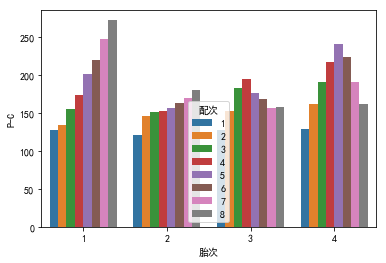

In [191]:
sns.barplot(y='P-C',x='胎次',hue='配次',data=valid_pc1)

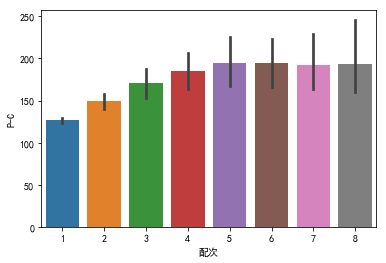

In [192]:
sns.barplot(y='P-C',x='配次',data=valid_pc1)

# 各性状先合并，按牛场分布作图

## 确定牛场所在省

In [193]:
cowtai=fz1[fz1['胎次']<20]

In [194]:
cowtai=cowtai[['牛号','胎次','场号']]

In [195]:
cowtai['胎次']=list(map(lambda s:str(s),cowtai['胎次']))

In [196]:
cowtai['cowtai']=cowtai['牛号']+'.'+cowtai['胎次']

In [197]:
cowtai['Region']=cowtai['场号'].apply(lambda s: 'BJ' if s.startswith('11') else s)
cowtai['Region']=cowtai['Region'].apply(lambda s: 'SH' if s.startswith('31') else s)
cowtai['Region']=cowtai['Region'].apply(lambda s: 'NX' if s.startswith('64') else s)
cowtai['Region']=cowtai['Region'].apply(lambda s: s if len(s)==2 else 'other')

In [198]:
cowtai=cowtai.drop_duplicates(subset='cowtai',keep='first')

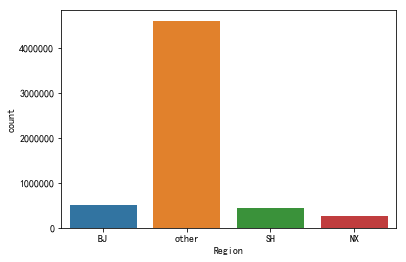

In [199]:
herd=sns.countplot(x="Region", data=cowtai)

## 性状合并

In [200]:
pre=pd.merge(cowtai,AFSS1,on='牛号',how='left')

In [201]:
pre1=pd.merge(pre,AFCC1,on='牛号',how='left')

In [202]:
pre2=pd.merge(pre1,ICF,on='cowtai',how='left')

In [203]:
pre3=pd.merge(pre2,iflt1,on='cowtai',how='left')

In [204]:
print(AFSS1.count())
print('-'*20)
print(AFCC1.count())
print('-'*20)
print(ICF.count())
print('-'*20)
print(iflt1.count())

牛号     356029
AFS    356029
dtype: int64
--------------------
牛号     2048679
AFC    2048679
dtype: int64
--------------------
cowtai    270731
ICF1      270731
dtype: int64
--------------------
cowtai    382244
IFL       382244
dtype: int64


In [205]:
PRE_R=pre3.groupby([pre3['Region']],as_index=False).count()

In [206]:
print(PRE_R)

        牛号       胎次       场号   cowtai   Region     AFS      AFC    ICF1  \
0   508210   508210   508210   508210   508210   62823   405554     116   
1   306936   306936   306936   306936   306936  156953   244882   99134   
2   440928   440928   440928   440928   440928    4210   352176    1675   
3  4771940  4771940  4771940  4771940  4771940  566990  3389849  290124   

      IFL  
0     176  
1   92503  
2    1304  
3  199426  


IFL数据合并之后要比提取的IFL数据少，需要在检查。不过可以看出配种相关的性状IFL,ICF北京和上海几乎没有数据，说明奶协数据的配种记录是其余地区的。

In [207]:
pre4=pre3[['Region','AFS','AFC','ICF1','IFL']]

In [208]:
PREM_R=pre4.groupby([pre3['Region']],as_index=False).mean()
PRES_R=pre4.groupby([pre3['Region']],as_index=False).std()

In [209]:
print(PREM_R)
print('-'*20)
print(PRES_R)

          AFS         AFC        ICF1        IFL
0  810.878086  796.213002  137.068966   0.000000
1  595.098501  780.969504   96.246969  30.069619
2  627.249881  778.736677   89.987463  37.505368
3  545.926720  809.161480   93.086573  59.636567
--------------------
          AFS         AFC       ICF1        IFL
0   49.783676   83.705587  58.219483   0.000000
1  172.875192  103.725298  36.362818  65.333237
2  185.782487   76.546828  20.677543  66.385453
3  137.437427  101.942078  22.438891  83.472187


# 计算各性状对应效应并合并

AFSS,AFCC

## AFS的效应

评估AFS性状的模型中效应包含YMB,HYB,YMI,HYI

In [210]:
AFSS.head()

牛号       出生日期       初配日期  AFS
0  110001009001 2009-01-06 2011-02-25  780
1  110001009041 2009-03-29 2011-07-08  831
2  110001009048 2009-04-06 2011-08-08  854
3  110001009055 2009-04-25 2011-08-08  835
4  110001009068 2009-05-15 2011-07-25  801

In [211]:
AFSS['出生日期']=list(map(lambda s:str(s),AFSS['出生日期']))
AFSS['初配日期']=list(map(lambda s:str(s),AFSS['初配日期']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [212]:
AFSS['HYB']=AFSS['牛号'].apply(lambda s:s[0:6])+AFSS['出生日期'].apply(lambda s:s.split('-')[0])
AFSS['YMB']=AFSS['出生日期'].apply(lambda s:s.split('-')[0])+AFSS['出生日期'].apply(lambda s:s.split('-')[1])
AFSS['HYI']=AFSS['牛号'].apply(lambda s:s[0:6])+AFSS['初配日期'].apply(lambda s:s.split('-')[0])
AFSS['YMI']=AFSS['初配日期'].apply(lambda s:s.split('-')[0])+AFSS['初配日期'].apply(lambda s:s.split('-')[1])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [213]:
AFSS.head()

牛号                 出生日期                 初配日期  AFS         HYB  \
0  110001009001  2009-01-06 00:00:00  2011-02-25 00:00:00  780  1100012009   
1  110001009041  2009-03-29 00:00:00  2011-07-08 00:00:00  831  1100012009   
2  110001009048  2009-04-06 00:00:00  2011-08-08 00:00:00  854  1100012009   
3  110001009055  2009-04-25 00:00:00  2011-08-08 00:00:00  835  1100012009   
4  110001009068  2009-05-15 00:00:00  2011-07-25 00:00:00  801  1100012009   

      YMB         HYI     YMI  
0  200901  1100012011  201102  
1  200903  1100012011  201107  
2  200904  1100012011  201108  
3  200904  1100012011  201108  
4  200905  1100012011  201107

In [214]:
AFSSf=AFSS[['牛号','HYB','YMB','HYI','YMI','AFS']]

## AFC的效应

评估AFC性状的模型中效应包含YMB,HYB,YMI,HYI，MF之后统一计算

In [215]:
AFCC['出生日期']=list(map(lambda s:str(s),AFCC['出生日期']))
AFCC['产犊日期']=list(map(lambda s:str(s),AFCC['产犊日期']))

AFCC['HYB']=AFCC['牛号'].apply(lambda s:s[0:6])+AFCC['出生日期'].apply(lambda s:s.split('-')[0])
AFCC['YMB']=AFCC['出生日期'].apply(lambda s:s.split('-')[0])+AFCC['出生日期'].apply(lambda s:s.split('-')[1])
AFCC['HYI']=AFCC['牛号'].apply(lambda s:s[0:6])+AFCC['产犊日期'].apply(lambda s:s.split('-')[0])
AFCC['YMI']=AFCC['产犊日期'].apply(lambda s:s.split('-')[0])+AFCC['产犊日期'].apply(lambda s:s.split('-')[1])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [216]:
AFCCf=AFCC[['牛号','HYB','YMB','HYI','YMI','AFC']]

In [217]:
AFCCf.head()

牛号         HYB     YMB         HYI     YMI    AFC
0  110001000001  1100012000  200001  1100012002  200201  744.0
1  110001000003  1100012000  200001  1100012002  200201  739.0
2  110001000006  1100012000  200001  1100012002  200203  799.0
3  110001000007  1100012000  200001  1100012002  200207  903.0
4  110001000008  1100012000  200001  1100012002  200203  774.0

## 青年牛IFL的效应

pce，pcifl1，iflhv

In [218]:
pce1.head()

牛号  胎次   配次       配种日期      场号 yearp monthp     YMI  \
310591  110055H11322   0  1.0   2013/4/8  110055  2013      4   20134   
392955  110120120072   0  1.0   2014/5/8  110120  2014      5   20145   
844715  13a003033500   0  1.0  2013/12/6  13a003  2013     12  201312   
844999  13a003090007   0  1.0  2013/7/10  13a003  2013      7   20137   
845009  13a003090018   0  1.0  2013/11/8  13a003  2013     11  201311   

               HYI          cowtai  
310591  1100552013  110055H11322.1  
392955  1101202014  110120120072.1  
844715  13a0032013  13a003033500.1  
844999  13a0032013  13a003090007.1  
845009  13a0032013  13a003090018.1

In [219]:
pcifl1.head()

牛号 胎次       产犊日期          cowtai     首次配种罚项       配种日期  IFL
0  13a003080027  3 2013-01-28  13a003080027.3 2013-05-03 2014-01-26  268
2  13a003110016  3 2015-08-04  13a003110016.3 2015-11-07 2016-06-06  212
3  13a003110030  1 2014-03-05  13a003110030.1 2014-06-08 2014-10-01  115
4  13a003111070  4 2016-01-20  13a003111070.4 2016-04-24 2016-06-26   63
5  13a003121064  3 2016-01-17  13a003121064.3 2016-04-21 2016-05-31   40

In [220]:
iflhv.head()

牛号  胎次   配次          cowtai       配种日期       初配日期  IFL
0  13a003110046   0  2.0  13a003110046.0 2014-11-20 2014-03-05  260
1  13a003120084   0  2.0  13a003120084.0 2014-05-09 2013-11-08  182
2  13a003120090   0  2.0  13a003120090.0 2014-10-10 2014-03-04  220
3  13a003130004   0  2.0  13a003130004.0 2014-11-10 2014-09-03   68
4  13a003130036   0  2.0  13a003130036.0 2014-11-05 2014-08-18   79

青年牛数据为pce1，以及iflhv数据集，先对其进行合并，并添加出生日期数据，青年牛IFL评估所要的效应为HYI,YMI,HYB,YMB，以及MF。

In [221]:
iflh_1=pce1[['牛号','配种日期']]
iflh_1['IFL']=0

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [222]:
iflh_2=iflhv[['牛号','初配日期','IFL']]
iflh_2.rename(columns={'初配日期':'配种日期'},inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [223]:
iflh=pd.concat([iflh_1,iflh_2])

In [224]:
iflhb=b1[['牛号','YMB','HYB']]

In [225]:
iflh=pd.merge(iflh,iflhb,on='牛号',how='left')

In [226]:
iflh['配种日期']=list(map(lambda s:str(s),iflh['配种日期']))
iflh['配种日期']=iflh['配种日期'].apply(lambda s : s.replace('/','-'))
iflh['HYI']=iflh['牛号'].apply(lambda s:s[0:6])+iflh['配种日期'].apply(lambda s:s.split('-')[0])
iflh['YMI']=iflh['配种日期'].apply(lambda s:s.split('-')[0])+iflh['配种日期'].apply(lambda s:s.split('-')[1])

In [227]:
iflhf=iflh[['牛号','HYB','YMB','HYI','YMI','IFL']]

## 青年牛性状合并计算MF效应

In [228]:
heifer=pd.concat([AFSSf,AFCCf,iflhf])

In [229]:
heifer.count()

AFC    2048679
AFS     356029
HYB    2577101
HYI    2577361
IFL     172653
YMB    2577101
YMI    2577361
牛号     2577361
dtype: int64

In [230]:
heifer['MF'] = pd.cut(heifer['AFS'], 5,labels=[1, 2, 3, 4, 5]) #数据AFS均分5份

In [231]:
heifer.head()

AFC    AFS         HYB         HYI  IFL     YMB     YMI            牛号 MF
0  NaN  780.0  1100012009  1100012011  NaN  200901  201102  110001009001  5
1  NaN  831.0  1100012009  1100012011  NaN  200903  201107  110001009041  5
2  NaN  854.0  1100012009  1100012011  NaN  200904  201108  110001009048  5
3  NaN  835.0  1100012009  1100012011  NaN  200904  201108  110001009055  5
4  NaN  801.0  1100012009  1100012011  NaN  200905  201107  110001009068  5

## 经产牛IFL效应

经产牛的IFL数据在pcifl1和pce2数据集中，经产牛IFL所需的效应有：HYI,YMI,Parity

In [232]:
iflc_1=pcifl1[['牛号','胎次','首次配种罚项','IFL']]
iflc_1.rename(columns={'首次配种罚项':'配种日期'},inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [233]:
iflc_2=pce2[['牛号','胎次','配种日期']]
iflc_2['IFL']=0

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [234]:
iflc=pd.concat([iflc_1,iflc_2])
iflc=pd.merge(iflc,iflhb,on='牛号',how='left')

In [235]:
iflc['配种日期']=list(map(lambda s:str(s),iflc['配种日期']))
iflc['配种日期']=iflc['配种日期'].apply(lambda s : s.replace('/','-'))
iflc['HYI']=iflc['牛号'].apply(lambda s:s[0:6])+iflc['配种日期'].apply(lambda s:s.split('-')[0])
iflc['YMI']=iflc['配种日期'].apply(lambda s:s.split('-')[0])+iflc['配种日期'].apply(lambda s:s.split('-')[1])

In [236]:
iflc_f=iflc[['牛号','胎次','HYB','YMB','HYI','YMI','IFL']]

In [237]:
iflc_f.count()

牛号     219273
胎次     219273
HYB    218337
YMB    218337
HYI    219273
YMI    219273
IFL    219273
dtype: int64

## ICF的效应

ICF数据包含在icf和pcd2两个数据集中，所需效应为Parity,HYC,YMC以及MF。

In [238]:
icf.head()

cowtai       配种日期       产犊日期  ICF1
0   110010201304.7 2011-12-12 2011-07-13   152
6   110015011111.4 2017-05-12 2016-12-09   154
7   110015011283.1 2013-12-30 2013-06-20   193
10  110015130180.3 2017-10-02 2017-05-01   154
11  110015130467.2 2017-10-10 2017-04-28   165

In [239]:
pcd2.count()

牛号        155787
胎次        155787
配次        155787
cowtai    155787
配种日期      155787
dtype: int64

In [240]:
icf['胎次']=icf['cowtai'].apply(lambda s : s.split('.')[1])
icf['牛号']=icf['cowtai'].apply(lambda s : s.split('.')[0])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [241]:
icf.rename(columns={'ICF1':'ICF'},inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [242]:
icf_1=icf[['牛号','胎次','ICF','cowtai']]
icf_2=pcd2[['牛号','胎次','cowtai']]
icf_2['ICF']=95 #罚项平均值

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [243]:
c1.head()

牛号  胎次       产犊日期      场号  yearc monthc    YMC         HYC
0  110001000001   1  2002/1/19  110001   2002      1  20021  1100012002
1  110001000003   1  2002/1/18  110001   2002      1  20021  1100012002
2  110001000006   1  2002/3/25  110001   2002      3  20023  1100012002
3  110001000007   1  2002/7/12  110001   2002      7  20027  1100012002
4  110001000008   1   2002/3/4  110001   2002      3  20023  1100012002

In [244]:
icf_=pd.concat([icf_1,icf_2])

In [245]:
icfc=c1[:]

In [246]:
icfc['牛号']=list(map(lambda s : str(s),icfc['牛号']))
icfc['胎次']=list(map(lambda s : str(s),icfc['胎次']))

In [247]:
icfc['cowtai']=icfc['牛号']+'.'+icfc['胎次']

In [248]:
icfcf=icfc[['cowtai','HYC','YMC']]

In [249]:
icf_f=pd.merge(icf_,icfcf,on='cowtai',how='left')

In [250]:
icf_f.count()

ICF       270731
cowtai    270731
牛号        270731
胎次        270731
HYC       266711
YMC       266711
dtype: int64

## 经产牛性状合并计算MF效应

In [251]:
cow=pd.concat([icf_f,iflc_f])

In [252]:
MF=AFSSf[['牛号','AFS']]

In [253]:
cow=pd.merge(cow,MF,on='牛号',how='left')

In [254]:
cow['MF'] = pd.cut(cow['AFS'], 5,labels=[1, 2, 3, 4, 5]) #数据AFS均分5份

In [255]:
cow.count()

HYB       296424
HYC       391043
HYI       297360
ICF       396708
IFL       297360
YMB       296424
YMC       391043
YMI       297360
cowtai    396708
牛号        694068
胎次        694068
AFS       486204
MF        486204
dtype: int64

# 筛选出宁夏、其他地区的数据进行下一步整理

In [256]:
cowtai=fz1[fz1['胎次']<20]
cowtai=cowtai[['牛号','胎次','场号']]
cowtai['胎次']=list(map(lambda s:str(s),cowtai['胎次']))
cowtai['cowtai']=cowtai['牛号']+'.'+cowtai['胎次']

In [257]:
cowtai['Region']=cowtai['场号'].apply(lambda s: 'BJ' if s.startswith('11') else s)
cowtai['Region']=cowtai['Region'].apply(lambda s: 'SH' if s.startswith('31') else s)
cowtai['Region']=cowtai['Region'].apply(lambda s: 'NX' if s.startswith('64') else s)
cowtai['Region']=cowtai['Region'].apply(lambda s: s if len(s)==2 else 'other')

In [258]:
cowtai.head()

牛号 胎次      场号          cowtai Region
0  110001000001  1  110001  110001000001.1     BJ
1  110001000003  1  110001  110001000003.1     BJ
2  110001000006  1  110001  110001000006.1     BJ
3  110001000007  1  110001  110001000007.1     BJ
4  110001000008  1  110001  110001000008.1     BJ

In [259]:
heifer['场号']=heifer['牛号'].apply(lambda s : s[0:6])
heifer['Region']=heifer['场号'].apply(lambda s: 'BJ' if s.startswith('11') else s)
heifer['Region']=heifer['Region'].apply(lambda s: 'SH' if s.startswith('31') else s)
heifer['Region']=heifer['Region'].apply(lambda s: 'NX' if s.startswith('64') else s)
heifer['Region']=heifer['Region'].apply(lambda s: s if len(s)==2 else 'other')

In [260]:
cow['场号']=cow['牛号'].apply(lambda s : s[0:6])
cow['Region']=cow['场号'].apply(lambda s: 'BJ' if s.startswith('11') else s)
cow['Region']=cow['Region'].apply(lambda s: 'SH' if s.startswith('31') else s)
cow['Region']=cow['Region'].apply(lambda s: 'NX' if s.startswith('64') else s)
cow['Region']=cow['Region'].apply(lambda s: s if len(s)==2 else 'other')

## 将各数据集场号进行重新编号以便后续分析

In [261]:
code_1=heifer[['场号']]

In [262]:
code_2=cow[['场号']]

In [263]:
code=pd.concat([code_1,code_2]).drop_duplicates(keep='first')

In [264]:
code['HERD']=range(1,2925)
code.count()  #共有2924个牧场

场号      2924
HERD    2924
dtype: int64

In [265]:
code.head()

场号  HERD
0     110001     1
19    110010     2
1369  110012     3
2856  110015     4
7625  110017     5

In [266]:
heifer=pd.merge(heifer,code,on='场号',how='left')
del heifer['场号']

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


In [267]:
cow=pd.merge(cow,code,on='场号',how='left')
del cow['场号']

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


In [268]:
heifer['HERD']=heifer['HERD'].apply(lambda s : str(s))
heifer['HYB']=heifer['HYB'].apply(lambda s : str(s))
heifer['HYI']=heifer['HYI'].apply(lambda s : str(s))
cow['HERD']=cow['HERD'].apply(lambda s : str(s))
cow['HYB']=cow['HYB'].apply(lambda s : str(s))
cow['HYI']=cow['HYI'].apply(lambda s : str(s))
cow['HYC']=cow['HYC'].apply(lambda s : str(s))

In [269]:
heifer['HYB']=heifer['HERD']+heifer['HYB'].apply(lambda s: s[6:])
heifer['HYI']=heifer['HERD']+heifer['HYI'].apply(lambda s: s[6:])
cow['HYB']=cow['HERD']+cow['HYB'].apply(lambda s: s[6:])
cow['HYI']=cow['HERD']+cow['HYI'].apply(lambda s: s[6:])
cow['HYC']=cow['HERD']+cow['HYC'].apply(lambda s: s[6:])

## 筛选宁夏，其他地区数据

In [270]:
heifer_NX=heifer[heifer['Region']=='NX']
heifer_other=heifer[heifer['Region']=='other']

In [271]:
heifer_NX.head()

AFC    AFS      HYB      HYI  IFL     YMB     YMI            牛号 MF  \
271520  NaN  884.0  7052005  7052008  NaN  200512  200805  640001050337  5   
271521  NaN  876.0  7052006  7052008  NaN  200603  200807  640001060363  5   
271522  NaN  857.0  7052006  7052008  NaN  200603  200807  640001060372  5   
271523  NaN  845.0  7052006  7052008  NaN  200608  200812  640001060443  5   
271524  NaN  893.0  7052006  7052009  NaN  200608  200901  640001060445  5   

       Region HERD  
271520     NX  705  
271521     NX  705  
271522     NX  705  
271523     NX  705  
271524     NX  705

In [272]:
cow_NX=cow[cow['Region']=='NX']
cow_other=cow[cow['Region']=='other']

In [273]:
cow_NX.head()

HYB      HYC  HYI    ICF  IFL  YMB     YMC  YMI          cowtai  \
88870  705  7052009  705   43.0  NaN  NaN   20093  NaN  640001000253.6   
88871  705  7052008  705  134.0  NaN  NaN  200811  NaN  640001000398.6   
88872  705  7052009  705  123.0  NaN  NaN   20094  NaN  640001010418.6   
88873  705  7052009  705   59.0  NaN  NaN   20094  NaN  640001010512.6   
88874  705  7052009  705   80.0  NaN  NaN   20092  NaN  640001010520.6   

                 牛号 胎次  AFS  MF Region HERD  
88870  640001000253  6  NaN NaN     NX  705  
88871  640001000398  6  NaN NaN     NX  705  
88872  640001010418  6  NaN NaN     NX  705  
88873  640001010512  6  NaN NaN     NX  705  
88874  640001010520  6  NaN NaN     NX  705

In [274]:
cow_NX[['HERD']].drop_duplicates(keep='first').count()

HERD    76
dtype: int64

# 系谱匹配

## 系谱进行区域编号

In [4]:
ped=pd.read_csv("F:\\Python\\PED.csv",sep=",",low_memory=False)

In [5]:
ped['Region']=ped['牛号'].apply(lambda s: 'BJ' if s.startswith('11') else s)
ped['Region']=ped['Region'].apply(lambda s: 'SH' if s.startswith('31') else s)
ped['Region']=ped['Region'].apply(lambda s: 'NX' if s.startswith('64') else s)
ped['Region']=ped['Region'].apply(lambda s: s if len(s)==2 else 'other')

In [277]:
ped.head()

牛号       出生日期        父号            母号  CODE        DAM  \
0  110001000001   2000/1/6  11193546  110001099169     1     1827.0   
1  110001000003  2000/1/10  31195515  110001095046     2  2860945.0   
2  110001000006  2000/1/16  31195515  110001094056     3  2860946.0   
3  110001000007  2000/1/21  11194143  110001096113     4     1496.0   
4  110001000008  2000/1/20  11194143  110001090136     5  2860947.0   

        SIRE Region  
0  3970806.0     BJ  
1  3970807.0     BJ  
2  3970807.0     BJ  
3  3970808.0     BJ  
4  3970808.0     BJ

## 上海

In [6]:
ped_SH=ped[ped['Region']=='SH'][['牛号','CODE','SIRE','DAM','出生日期']].fillna(0)

In [7]:
ped_SH.count()

牛号      193374
CODE    193374
SIRE    193374
DAM     193374
出生日期    193374
dtype: int64

In [10]:
ped_SH.to_csv('F:\\fertility data\\SH 201809\\ped_SH.csv',index=False,sep=",",encoding='utf_8_sig')

## 宁夏

In [278]:
ped_NX=ped[ped['Region']=='NX'][['牛号','CODE','SIRE','DAM','出生日期']].fillna(0)

In [279]:
ped_NX.count()

牛号      125717
CODE    125717
SIRE    125717
DAM     125717
出生日期    125717
dtype: int64

In [280]:
ped_NX.rename(columns={'CODE':'ID'},inplace=True)

In [281]:
ped_NX1=ped_NX[['ID','SIRE','DAM','出生日期']].drop_duplicates(keep='first')

In [282]:
ped_NX1['ID']=ped_NX1['ID'].apply(lambda s: int(s))
ped_NX1['SIRE']=ped_NX1['SIRE'].apply(lambda s: int(s))
ped_NX1['DAM']=ped_NX1['DAM'].apply(lambda s: int(s))

In [283]:
ped_NX1.to_csv('F:\\fertility data\\NX 201809\\ped_NX.txt',index=False,sep=" ",header=False,encoding='utf_8_sig')

In [284]:
NX_heifer=pd.merge(heifer_NX,ped_NX[['牛号','ID']],on='牛号',how='left')
NX_cow=pd.merge(cow_NX,ped_NX[['牛号','ID']],on='牛号',how='left')

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


In [285]:
NX_heifer=NX_heifer[['HYB','YMB','HYI','YMI','MF','ID','AFS','AFC','IFL']].drop_duplicates(keep='first')
NX_cow=NX_cow[['HYB','YMB','HYI','YMI','HYC','YMC','胎次','MF','ID','ICF','IFL']].drop_duplicates(keep='first')

In [286]:
NX_heifer['HYB'] = NX_heifer['HYB'].apply(lambda s: 66666 if pd.isnull(s) else s)
NX_heifer['YMB'] = NX_heifer['YMB'].apply(lambda s: 66666 if pd.isnull(s) else s)
NX_heifer['HYI'] = NX_heifer['HYI'].apply(lambda s: 66666 if pd.isnull(s) else s)
NX_heifer['YMI'] = NX_heifer['YMI'].apply(lambda s: 66666 if pd.isnull(s) else s)
NX_heifer['MF']= NX_heifer['MF'].astype(int)
NX_heifer['MF'] = NX_heifer['MF'].apply(lambda s: 66666 if s<0 else s)
NX_heifer['AFS'] = NX_heifer['AFS'].apply(lambda s: '-9999' if pd.isnull(s) else s)
NX_heifer['AFC'] = NX_heifer['AFC'].apply(lambda s: '-9999' if pd.isnull(s) else s)
NX_heifer['IFL'] = NX_heifer['IFL'].apply(lambda s: '-9999' if pd.isnull(s) else s)
NX_heifer['ID'] = NX_heifer['ID'].apply(lambda s: 0 if pd.isnull(s) else int(s))

In [287]:
NX_cow['HYB'] = NX_cow['HYB'].apply(lambda s: 66666 if pd.isnull(s) else s)
NX_cow['YMB'] = NX_cow['YMB'].apply(lambda s: 66666 if pd.isnull(s) else s)
NX_cow['HYI'] = NX_cow['HYI'].apply(lambda s: 66666 if pd.isnull(s) else s)
NX_cow['YMI'] = NX_cow['YMI'].apply(lambda s: 66666 if pd.isnull(s) else s)
NX_cow['HYC'] = NX_cow['HYC'].apply(lambda s: 66666 if pd.isnull(s) else s)
NX_cow['YMC'] = NX_cow['YMC'].apply(lambda s: 66666 if pd.isnull(s) else s)
NX_cow['MF']= NX_cow['MF'].astype(int)
NX_cow['MF'] = NX_cow['MF'].apply(lambda s: 66666 if s<0 else s)
NX_cow['ICF'] = NX_cow['ICF'].apply(lambda s: '-9999' if pd.isnull(s) else s)
NX_cow['IFL'] = NX_cow['IFL'].apply(lambda s: '-9999' if pd.isnull(s) else s)
NX_cow['ID'] = NX_cow['ID'].apply(lambda s: 0 if pd.isnull(s) else int(s))

In [288]:
NX_heifer1=NX_heifer[NX_heifer['ID']>0]
NX_cow1=NX_cow[NX_cow['ID']>0]

In [289]:
NX_cow.head()

HYB    YMB  HYI    YMI      HYC     YMC 胎次     MF       ID  ICF    IFL
0  705  66666  705  66666  7052009   20093  6  66666  2585937   43  -9999
1  705  66666  705  66666  7052008  200811  6  66666  2585944  134  -9999
2  705  66666  705  66666  7052009   20094  6  66666  2585946  123  -9999
3  705  66666  705  66666  7052009   20094  6  66666  2585954   59  -9999
4  705  66666  705  66666  7052009   20092  6  66666  2585957   80  -9999

In [290]:
NX_heifer1.to_csv('F:\\fertility data\\NX 201809\\heifer_NX.txt',sep=" ",index=False,header=False,encoding='utf_8_sig')
NX_cow1.to_csv('F:\\fertility data\\NX 201809\\cow_NX.txt',sep=" ",index=False,header=False,encoding='utf_8_sig')

## 其他地区

In [291]:
ped_other=ped[ped['Region']=='other'][['牛号','CODE','SIRE','DAM','出生日期']].fillna(0)

In [292]:
ped_other.count()

牛号      2320443
CODE    2320443
SIRE    2320443
DAM     2320443
出生日期    2320443
dtype: int64

In [293]:
ped_other.rename(columns={'CODE':'ID'},inplace=True)

In [294]:
ped_other1=ped_other[['ID','SIRE','DAM','出生日期']].drop_duplicates(keep='first')

In [295]:
ped_other1['ID']=ped_other1['ID'].apply(lambda s : int(s))
ped_other1['SIRE']=ped_other1['SIRE'].apply(lambda s : int(s))
ped_other1['DAM']=ped_other1['DAM'].apply(lambda s : int(s))

In [296]:
ped_other1['出生日期']=ped_other1['出生日期'].apply(lambda s : str(s))

In [297]:
ped_other1.to_csv('F:\\fertility data\\other 201809\\ped_other.txt',index=False,header=False,sep='\t',encoding='utf_8_sig')

In [298]:
other_heifer=pd.merge(heifer_other,ped_other[['牛号','ID']],on='牛号',how='left')
other_cow=pd.merge(cow_other,ped_other[['牛号','ID']],on='牛号',how='left')

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


In [299]:
other_heifer=other_heifer[['HYB','YMB','HYI','YMI','MF','ID','AFS','AFC','IFL']].drop_duplicates(keep='first')
other_cow=other_cow[['HYB','YMB','HYI','YMI','HYC','YMC','胎次','MF','ID','ICF','IFL']].drop_duplicates(keep='first')

In [300]:
other_heifer['HYB'] = other_heifer['HYB'].apply(lambda s: 66666 if pd.isnull(s) else s)
other_heifer['YMB'] = other_heifer['YMB'].apply(lambda s: 66666 if pd.isnull(s) else s)
other_heifer['HYI'] = other_heifer['HYI'].apply(lambda s: 66666 if pd.isnull(s) else s)
other_heifer['YMI'] = other_heifer['YMI'].apply(lambda s: 66666 if pd.isnull(s) else s)
other_heifer['MF']= other_heifer['MF'].astype(int)
other_heifer['MF'] = other_heifer['MF'].apply(lambda s: 66666 if s<0 else s)
other_heifer['AFS'] = other_heifer['AFS'].apply(lambda s: '-9999' if pd.isnull(s) else s)
other_heifer['AFC'] = other_heifer['AFC'].apply(lambda s: '-9999' if pd.isnull(s) else s)
other_heifer['IFL'] = other_heifer['IFL'].apply(lambda s: '-9999' if pd.isnull(s) else s)
other_heifer['ID'] = other_heifer['ID'].apply(lambda s: 0 if pd.isnull(s) else int(s))

In [301]:
other_cow['HYB'] = other_cow['HYB'].apply(lambda s: 66666 if pd.isnull(s) else s)
other_cow['YMB'] = other_cow['YMB'].apply(lambda s: 66666 if pd.isnull(s) else s)
other_cow['HYI'] = other_cow['HYI'].apply(lambda s: 66666 if pd.isnull(s) else s)
other_cow['YMI'] = other_cow['YMI'].apply(lambda s: 66666 if pd.isnull(s) else s)
other_cow['HYC'] = other_cow['HYC'].apply(lambda s: 66666 if pd.isnull(s) else s)
other_cow['YMC'] = other_cow['YMC'].apply(lambda s: 66666 if pd.isnull(s) else s)
other_cow['MF']= other_cow['MF'].astype(int)
other_cow['MF'] = other_cow['MF'].apply(lambda s: 66666 if s<0 else s)
other_cow['ICF'] = other_cow['ICF'].apply(lambda s: '-9999' if pd.isnull(s) else s)
other_cow['IFL'] = other_cow['IFL'].apply(lambda s: '-9999' if pd.isnull(s) else s)
other_cow['ID'] = other_cow['ID'].apply(lambda s: 0 if pd.isnull(s) else int(s))

In [302]:
other_heifer1=other_heifer[other_heifer['ID']>0]
other_cow1=other_cow[other_cow['ID']>0]

In [303]:
other_heifer.to_csv('F:\\fertility data\\other 201809\\heifer_other.txt',index=False,header=False,sep='\t',encoding='utf_8_sig')
other_cow.to_csv('F:\\fertility data\\other 201809\\cow_other.txt',index=False,header=False,sep='\t',encoding='utf_8_sig')

# other地区数据最多的前十省份作图

In [305]:
ped_other_plot=pedigree[pedigree['Region']=='other'][['场号']]

NameError: name 'pedigree' is not defined

In [ ]:
ped_other_plot['area']=ped_other_plot['场号'].apply(lambda s:s[0:2])

In [ ]:
top_10=ped_other_plot['area'].value_counts()[0:10]

In [ ]:
top_10=pd.DataFrame(top_10)

In [ ]:
top_10

In [ ]:
p={'area':['河北','天津','内蒙','山西','辽宁','黑龙江','山东','河南','陕西','新疆'],
   'counts':[348934,148368,297046,116804,166815,305616,220624,160279,84132,147800]}

In [ ]:
pro=pd.DataFrame(data=p)

In [ ]:
sns.barplot(x=pro['area'],y=pro['counts'])
plt.title('数据分布TOP10')

# 按各效应作图

## 各性状质控前分布图

In [192]:
AFS2.describe()

AFS          yearb          yearp
count  398905.000000  398905.000000  398905.000000
mean      857.848332    2011.268274    2013.649511
std       594.231509       2.943807       2.334806
min     -5430.000000    1990.000000    2000.000000
25%       456.000000    2010.000000    2012.000000
50%       599.000000    2012.000000    2014.000000
75%      1043.000000    2013.000000    2016.000000
max      8575.000000    2017.000000    2018.000000

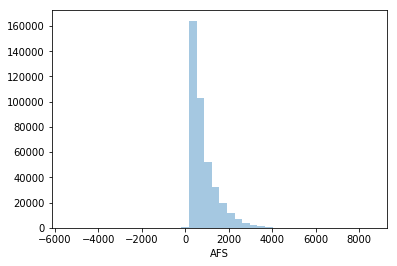

In [193]:
afs1=sns.distplot(AFS2['AFS'],kde=False,bins=40)

In [194]:
AFC2.describe()

AFC         yearb         yearc
count  2.786103e+06  2.786103e+06  2.786103e+06
mean   9.984856e+02  2.009722e+03  2.012456e+03
std    4.590779e+02  4.127470e+00  3.730893e+00
min   -5.764000e+03  1.990000e+03  1.990000e+03
25%    7.460000e+02  2.007000e+03  2.010000e+03
50%    8.190000e+02  2.011000e+03  2.013000e+03
75%    1.096000e+03  2.013000e+03  2.015000e+03
max    7.853000e+03  2.018000e+03  2.018000e+03

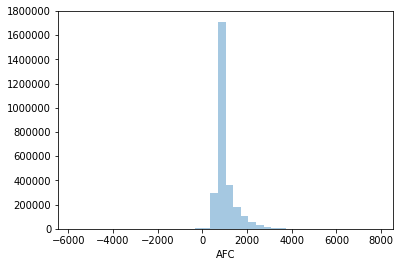

In [195]:
afc1=sns.distplot(AFC2['AFC'],kde=False,bins=40)

## 性状质控后作图

将AFS按照文献内国际标准筛选，保留[]

In [196]:
AFS3=AFS2[(AFS2['AFS'] >=270)&(AFS2['AFS'] <=900)]
AFS3.count()

牛号        274180
出生日期      274180
初配日期      274180
AFS       274180
场号        274180
yearb     274180
monthb    274180
HYB       274180
YMB       274180
yearp     274180
monthp    274180
HYI       274180
YMI       274180
dtype: int64

In [197]:
AFS3.describe()

AFS          yearb          yearp
count  274180.000000  274180.000000  274180.000000
mean      548.625950    2012.238026    2013.785119
std       149.715945       2.260814       2.208016
min       270.000000    1999.000000    2000.000000
25%       438.000000    2011.000000    2012.000000
50%       490.000000    2012.000000    2014.000000
75%       627.000000    2014.000000    2016.000000
max       900.000000    2016.000000    2018.000000

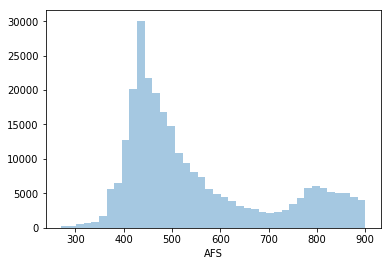

In [198]:
afs2=sns.distplot(AFS3['AFS'],kde=False,bins=40)

In [199]:
afs3=afs2.get_figure()
afs3.savefig('F:\\Python\\afs.png',bbox_inches='tight',dpi=500)

In [200]:
AFC3=AFC2[(AFC2['AFC'] >=500)&(AFC2['AFC'] <=1100)]
AFC3.count()

KeyboardInterrupt: 

In [ ]:
AFC3.describe()

In [ ]:
afc2=sns.distplot(AFC3['AFC'],kde=False,bins=40)

In [ ]:
afc3=afc2.get_figure()
afc3.savefig('F:\\Python\\afc.png',bbox_inches='tight',dpi=500)

## 性状按年分布

In [ ]:
afcy = sns.boxplot(x="yearc", y="AFC",data=AFC3, palette="Set3")
afcy1=afcy.set_xticklabels(afcy.get_xticklabels(), rotation=-90)

In [ ]:
afcy1=afcy.get_figure()
afcy1.savefig('F:\\Python\\afcy.png',bbox_inches='tight',dpi=500)

In [ ]:
afsy = sns.boxplot(x="yearp", y="AFS",data=AFS3, palette="Set2")
afsy1=afsy.set_xticklabels(afsy.get_xticklabels(), rotation=-90)

In [ ]:
afsy1=afsy.get_figure()
afsy1.savefig('F:\\Python\\afsy.png',bbox_inches='tight',dpi=500)

In [ ]:
afsy1=afsy.fig
afsy1.savefig('F:\\Python\\afsy.png',bbox_inches='tight',dpi=500)